# Autism Spectrum Disorder(ASD):
- Autism Spectrum Disorder (ASD) and Autism are both general terms for a group of complex disorders that are characterized by varying degrees of impairment in development. ASD is a disorder of neurodevelopment that is characterized by impaired social interaction and verbal and non-verbal communication.

- Individuals diagnosed may present restricted, repetitive, and/or excessive behavior. Signs and symptoms tend to typically manifest between 2-3 years of age. Autism and ASD can impair social communication, reciprocal social interaction and can include the presence of stereotyped behavior, narrow interests and limited engagement in activities.

- The early diagnosis of neurodevelopment disorders can improve treatment and significantly decrease the associated healthcare costs. In this project, we will use supervised learning to diagnose Autistic Spectrum Disorder (ASD) based on behavioural features and individual characteristics. More specifically, we will build and deploy a neural network using the Keras API.


# Causes and Challenges
It is mostly influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and problem-solve can range from highly skilled to severely challenged.
Research has made clear that high quality early intervention can improve learning, communication and social skills, as well as underlying brain development. Yet the diagnostic process can take several years.


# The Role of Machine Learning
This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.


# About this dataset
Columns

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

# Machine learning approaches to the classification problem for Autism Spectrum Disorder
Project designed and executed by Debatri Roy

I'll be using the "Autistic Spectrum Disorder Screening Data for Adults" public dataset from the Kaggle repository. The data we investigate here consists of small changes to the original dataset, such as removing some features and records with missing or ill-formatted entries. 

# Abstract: 
Autistic Spectrum Disorder (ASD) is a neurodevelopment condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.

The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of adults that contained 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Adult) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.

# Road Map:
Step 1: Import Datasets.

Step 2: Clean Datasets (The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers).

Step 3: A quick visualization with Seaborn.

Step 4: At First, I applied several Supervised Machine Learning (SML) techniques on the data for classification purpose.

Step 5: Next, I experimented with different topologies, optimizers, and hyperparameters for different models.

Step 6: Model tuning.

Step 7: Feature Selection.

Step 8: Then I built a Multi-Layer Perceptron and train it to classify indivisual with ASD based on its features.

Step 9: Conclusion.

<div>
<img src='https://spokesmanreview.s3.amazonaws.com/img/autism/autism-causes.png' style='float:left;width:400px;height:400px;'>
<img src='https://neurokids.in/wp-content/uploads/2020/02/Autism-800x800.jpg' style='float:right;width:400px;height:400px;'>
</div>

## Step 1: Import Datasets

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline
# Allows the use of display() for DataFrames
from IPython.display import display 
import warnings
warnings.filterwarnings('ignore')
from pycomp.viz.insights import *

In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


## Descriptive Analysis

In [3]:
data.shape

(800, 22)

In [4]:
data.isnull().any()

ID                 False
A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                False
gender             False
ethnicity          False
jaundice           False
austim             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation           False
Class/ASD          False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
# description of dataframe
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


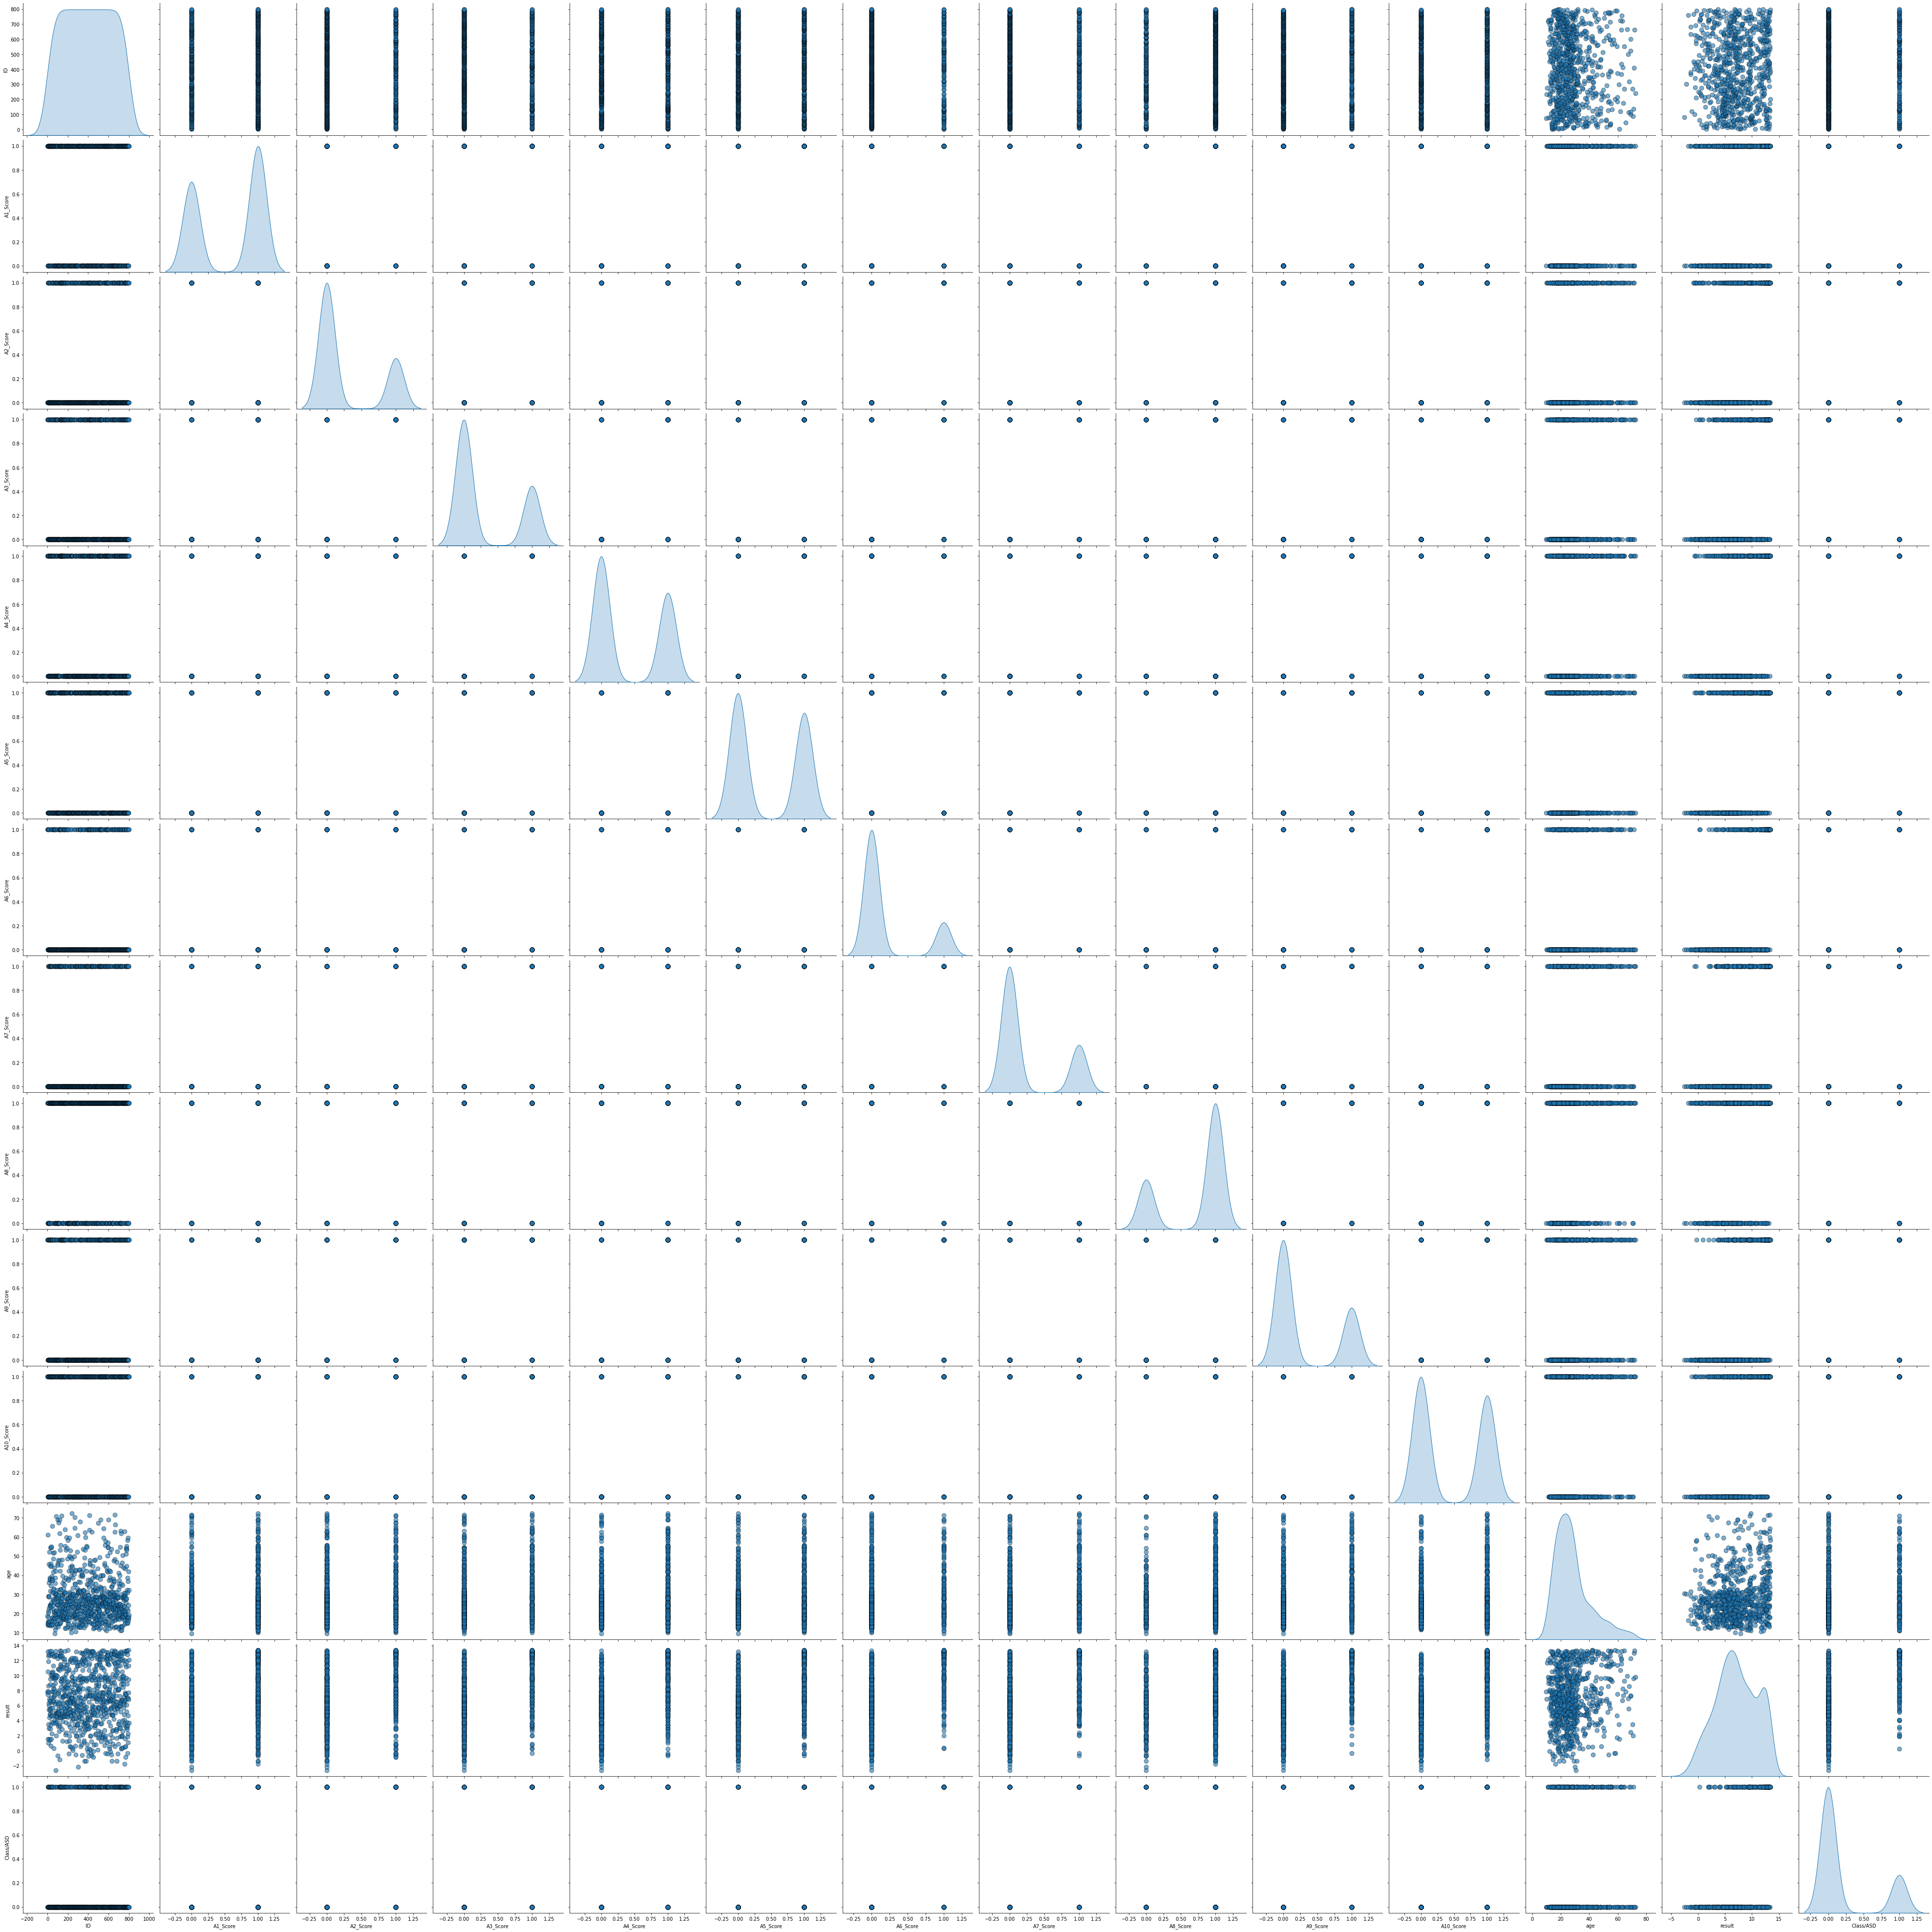

In [7]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},size=4)

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'A1_Score'}>,
        <AxesSubplot:title={'center':'A2_Score'}>,
        <AxesSubplot:title={'center':'A3_Score'}>],
       [<AxesSubplot:title={'center':'A4_Score'}>,
        <AxesSubplot:title={'center':'A5_Score'}>,
        <AxesSubplot:title={'center':'A6_Score'}>,
        <AxesSubplot:title={'center':'A7_Score'}>],
       [<AxesSubplot:title={'center':'A8_Score'}>,
        <AxesSubplot:title={'center':'A9_Score'}>,
        <AxesSubplot:title={'center':'A10_Score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'result'}>,
        <AxesSubplot:title={'center':'Class/ASD'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

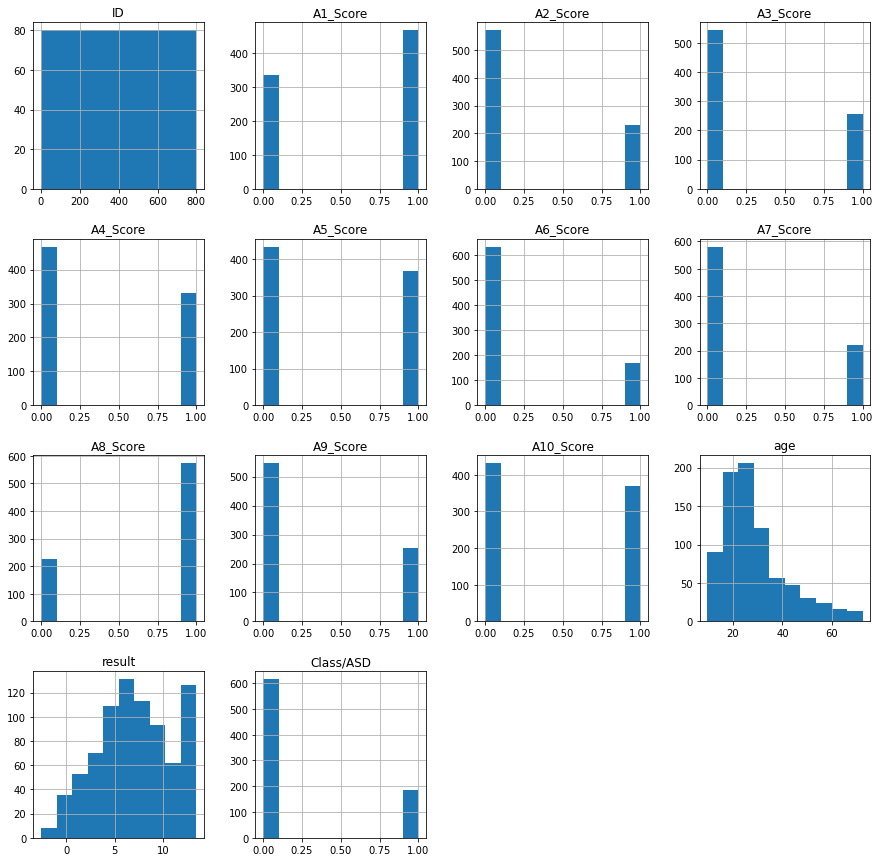

In [8]:
# Histograms:
data.hist(figsize=(15,15), xlabelsize = 10)

In [9]:
# correlation matrix
data.corr()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
ID,1.000000,0.000033,0.020399,0.022980,0.019576,0.028487,0.034421,-0.000989,0.055880,0.033785,-0.010437,-0.027853,0.019915,0.061677
A1_Score,0.000033,1.000000,0.244540,0.316452,0.322089,0.350073,0.291400,0.201426,0.240094,0.308672,0.308402,0.068834,0.319993,0.289991
A2_Score,0.020399,0.244540,1.000000,0.387516,0.359008,0.295492,0.361972,0.262422,0.194671,0.401893,0.342131,0.120668,0.340213,0.380703
A3_Score,0.022980,0.316452,0.387516,1.000000,0.518000,0.448251,0.489724,0.352090,0.229524,0.539535,0.460727,0.189076,0.479438,0.549618
A4_Score,0.019576,0.322089,0.359008,0.518000,1.000000,0.540342,0.447535,0.353415,0.297467,0.523767,0.439180,0.182165,0.503638,0.512792
A5_Score,0.028487,0.350073,0.295492,0.448251,0.540342,1.000000,0.411152,0.381568,0.252989,0.486979,0.436171,0.121511,0.509091,0.448473
A6_Score,0.034421,0.291400,0.361972,0.489724,0.447535,0.411152,1.000000,0.374446,0.240317,0.510524,0.402234,0.144511,0.460065,0.542588
A7_Score,-0.000989,0.201426,0.262422,0.352090,0.353415,0.381568,0.374446,1.000000,0.154847,0.414423,0.310831,0.188604,0.399434,0.394660
A8_Score,0.055880,0.240094,0.194671,0.229524,0.297467,0.252989,0.240317,0.154847,1.000000,0.223737,0.250461,0.115754,0.232593,0.219034
A9_Score,0.033785,0.308672,0.401893,0.539535,0.523767,0.486979,0.510524,0.414423,0.223737,1.000000,0.488759,0.207493,0.536908,0.538688


<AxesSubplot:>

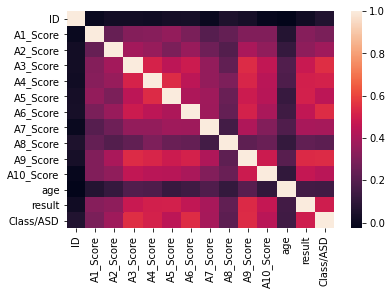

In [10]:
# correlation heat map
sns.heatmap(data.corr())

<AxesSubplot:>

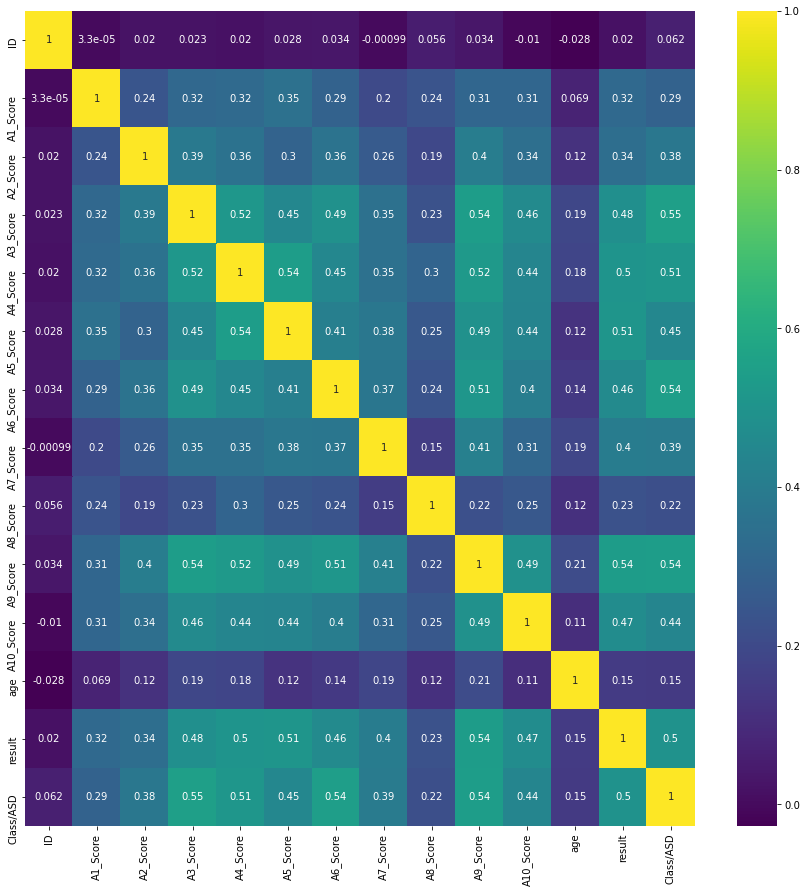

In [11]:
# Getting correlation value
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [12]:
# Total number of records
n_records = len(data.index)

# TODO: Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 1])

# TODO: Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 0])

# TODO: Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 800
Individuals diagonised with ASD: 185
Individuals not diagonised with ASD: 615
Percentage of individuals diagonised with ASD: 23.12%


## Featureset Exploration

### About this dataset
Columns

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

## Preparing the Data
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [13]:
asd_data = pd.read_csv('train.csv', na_values=['?'])
asd_data.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,NaN,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,NaN,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


Here I will evaluate whether the data needs cleaning; the model is only as good as the data it's given.

In [14]:
asd_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


There are quite a few missing values in the data set. Before I just drop every row that has missing data, I make sure not to bias the data in any way. In other words we need to make sure that, there does not appear to be any sort of correlation to what sort of data has missing fields. If there were, I would have to try and go back and fill that data in.

## Step 2: Clean Datasets

In [15]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jaundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,NaN,0
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,NaN,0
5,6,1,0,0,0,0,0,0,1,0,...,m,Asian,no,no,Nicaragua,no,7.445003,18 and more,NaN,0
7,8,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,yes,no,United Arab Emirates,no,3.525720,18 and more,NaN,0
9,10,0,0,0,0,0,0,1,1,0,...,f,NaN,yes,no,United States,no,8.633346,18 and more,Self,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,783,0,0,0,0,0,0,0,0,0,...,f,NaN,no,no,United Arab Emirates,no,3.136957,18 and more,Self,0
787,788,0,0,0,0,0,0,0,1,0,...,f,NaN,no,no,India,no,1.901899,18 and more,NaN,0
789,790,0,0,0,0,0,0,0,0,0,...,m,NaN,no,no,Russia,no,4.658415,18 and more,Self,0
790,791,0,0,0,0,0,0,0,0,0,...,m,Asian,no,no,United Arab Emirates,no,2.287009,18 and more,NaN,0


Since the missing data seems randomly distributed, I go ahead and drop rows with missing data.

In [16]:
asd_data.dropna(inplace=True)
asd_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,409.018581,0.665541,0.353041,0.385135,0.496622,0.528716,0.266892,0.319257,0.753378,0.400338,0.537162,29.194032,7.669127,0.285473
std,231.081950,0.472200,0.478319,0.487039,0.500411,0.499597,0.442709,0.466583,0.431409,0.490381,0.499039,13.370951,3.755442,0.452021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.560505,-1.798715,0.000000
25%,207.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.141494,4.974513,0.000000
50%,415.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,25.946451,7.458453,0.000000
75%,604.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.483782,11.081163,1.000000
max,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [17]:
asd_data.shape

(592, 22)

Previously the shape of the dataset was (800, 22). After cleaning the data, the shape is now (592,22).

If we could have fill with median values for 'NaN' instead of dropping them, in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

In [18]:
#asd_data.median()
#numerical = ['age', 'result']
#asd_data.fillna(asd_data[numerical].median())
#asd_data.describe()

Let's check out the data types of all our features including the target feature. Moreover, lets count the total number of instances and the target-class distribution.

In [19]:
# Reminder of the features:
print(asd_data.dtypes)


# Total number of records in clean dataset
n_records = len(asd_data.index)

# TODO: Number of records where individual's with ASD in the clean dataset
n_asd_yes = len(asd_data[asd_data['Class/ASD'] == 1])

# TODO: Number of records where individual's with no ASD in the clean dataset
n_asd_no = len(asd_data[asd_data['Class/ASD'] == 0])

# Print the results
print('------------------------------------------------------------')
print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(n_asd_no))

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object
------------------------------------------------------------
Total number of records: 592
Individuals diagonised with ASD: 169
Individuals not diagonised with ASD: 423


## Step 3: A quick visualization

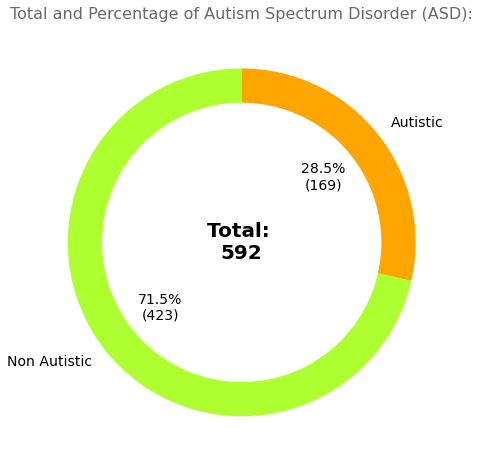

In [20]:
# Autism rate
autism_map = {1: 'Autistic', 0: 'Non Autistic'}
autism_colors = ['#ADFF2F', '#FFA500']
plot_donut_chart(df=asd_data, col='Class/ASD', label_names=autism_map, colors=autism_colors,
                 title='Total and Percentage of Autism Spectrum Disorder (ASD):')

In [21]:
sns.set(style="whitegrid", color_codes=True)

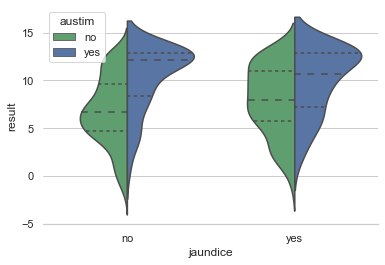

In [22]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jaundice", y="result", hue="austim", data=asd_data, split=True,
                inner="quart", palette={'yes': "b",'no': "g"})
sns.despine(left=True)

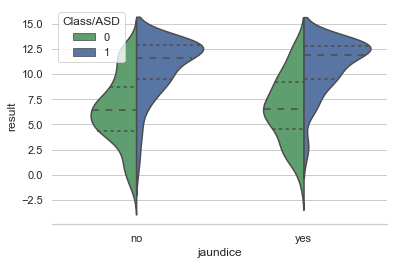

In [23]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jaundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={1: "b",0: "g"})
sns.despine(left=True)

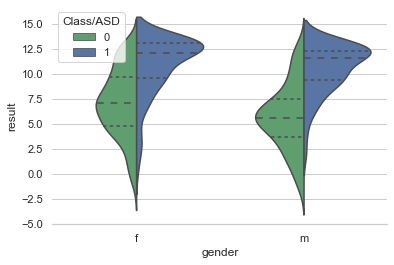

In [24]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={0: "g", 1: "b"})
sns.despine(left=True)

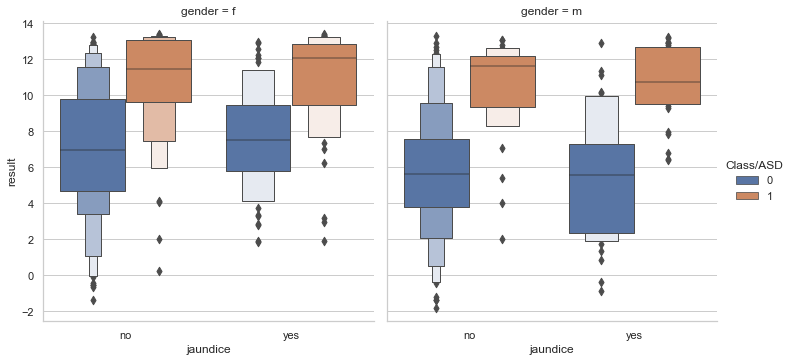

In [25]:
sns.catplot(x="jaundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="boxen")

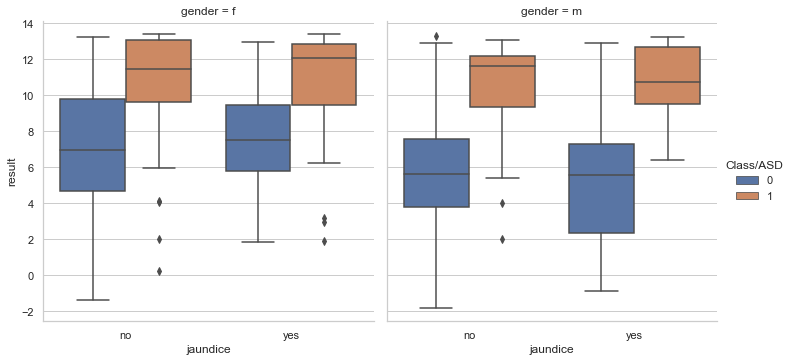

In [26]:
sns.catplot(x="jaundice", y="result", hue="Class/ASD", col="gender", data=asd_data, kind="box")

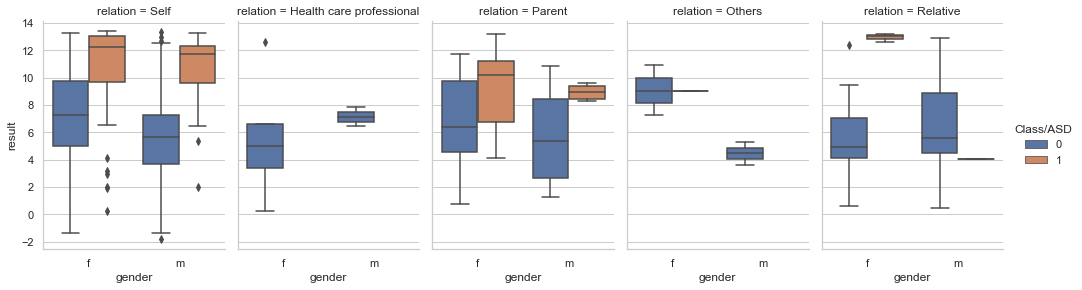

In [27]:
sns.catplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", height=4, aspect=.7)

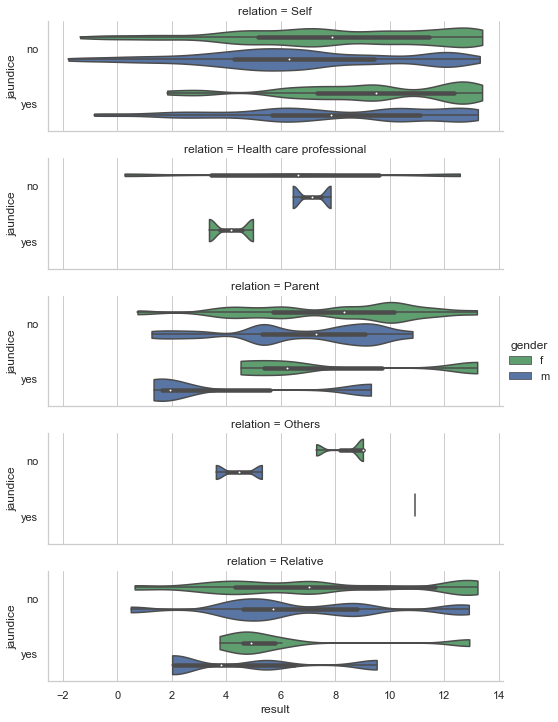

In [28]:
g = sns.catplot(x="result", y="jaundice", hue="gender", row="relation",
                   data=asd_data, orient="h", height=2, aspect=3.5, palette={'f': "g", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)

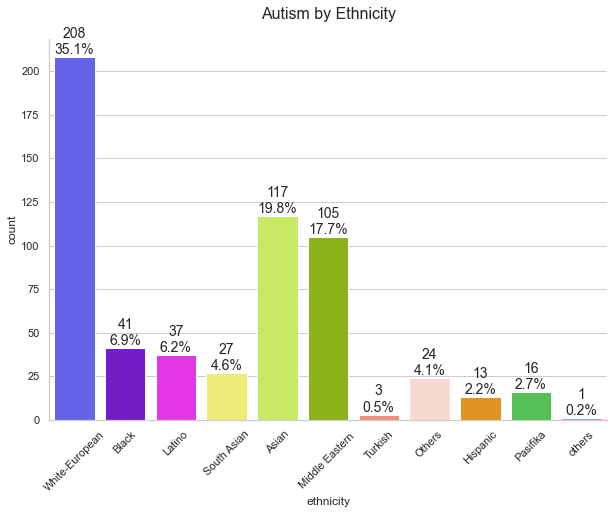

In [29]:
# Countplot for ethnicity
ethnicity_colors = ['#4d4dff', '#7300e6', '#ff1aff', '#ffff66', '#d2ff4d', '#99cc00', '#ff8566', '#ffd6cc', '#ff9900','#47d147', '#00ffcc', '#d580ff']

plot_countplot(df=asd_data, col='ethnicity', palette=ethnicity_colors, title='Autism by Ethnicity')
plt.xticks(rotation=45);

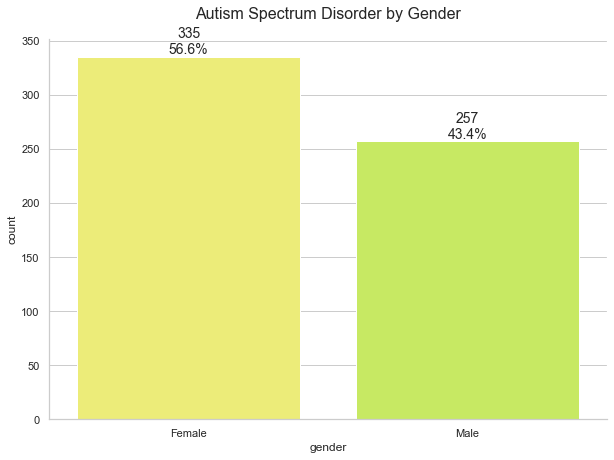

In [30]:
# Countplot for gender
gender_colors = ['#ffff66', '#d2ff4d']
gender_map = {'m': 'Male', 'f': 'Female'}
plot_countplot(df=asd_data, col='gender', palette=gender_colors, label_names=gender_map,
               title='Autism Spectrum Disorder by Gender')

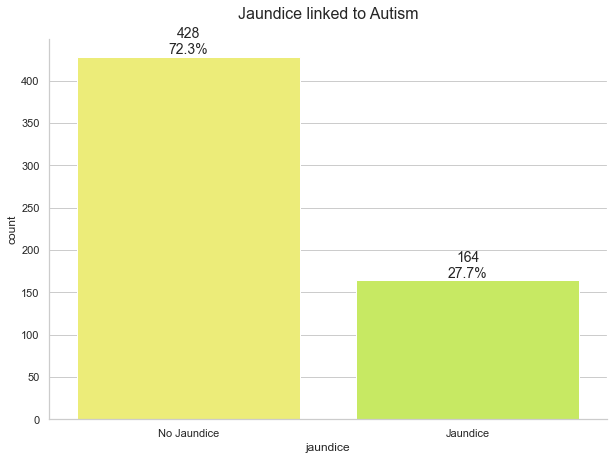

In [31]:
# Countplot for Jaudice
jaundice_colors = ['#ffff66', '#d2ff4d']
jaundice_map = {'yes': 'Jaundice', 'no': 'No Jaundice'}
plot_countplot(df=asd_data, col='jaundice', palette=jaundice_colors, label_names=jaundice_map,
               title='Jaundice linked to Autism')

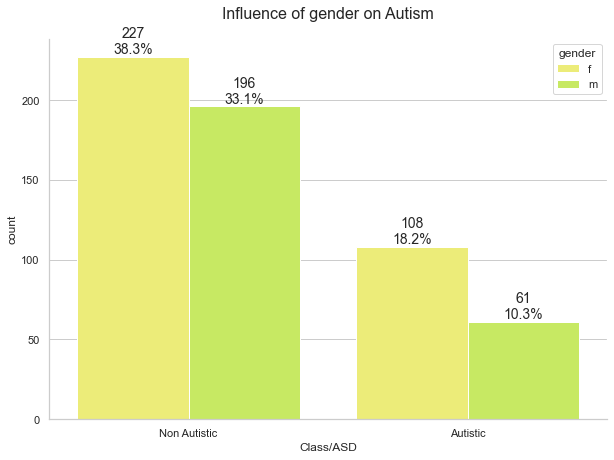

In [32]:
# Autism rate by gender
plot_countplot(df=asd_data, col='Class/ASD', hue='gender', label_names=autism_map, palette=gender_colors,
               title="Influence of gender on Autism")

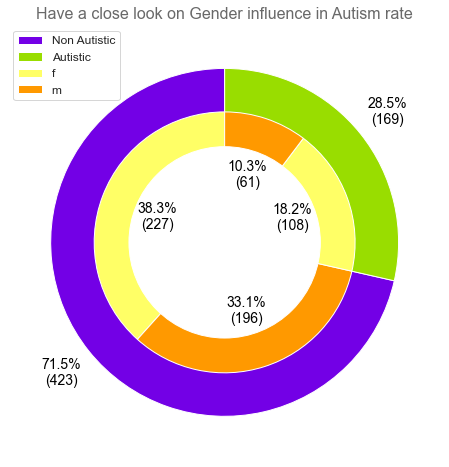

In [33]:
# Plotting a double donut chart
plot_double_donut_chart(df=asd_data, col1='Class/ASD', col2='gender', label_names_col1=autism_map, 
                        colors1=['#7300e6', '#99dd00'], colors2=['#ffff66', '#ff9900'],
                        title="Have a close look on Gender influence in Autism rate")

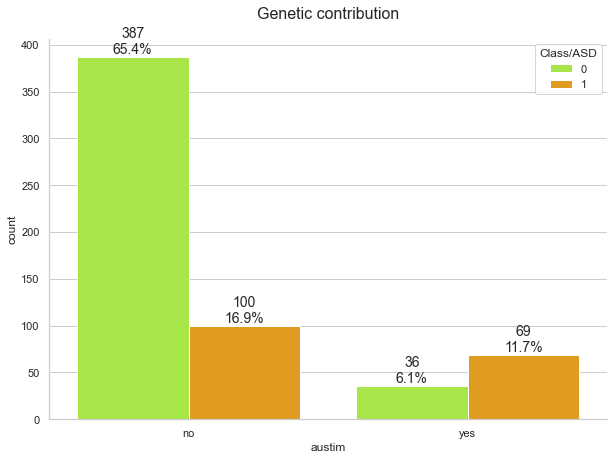

In [34]:
# Genetic Load: Relationship between Autism in Family Members and Autism
plot_countplot(df=asd_data, col='austim', hue='Class/ASD', orient='v', palette=autism_colors,
               title='Genetic contribution')

In the above figures, I have used different depiction techniques to have a quick peek on the ASD dataset I'm dealing with. I have used  different kind of graphs for expressing the relationship between several different features present in the data and how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

In [35]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Some of our models require the input data to be normalized, so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(5))

,age,gender,ethnicity,jaundice,austim,contry_of_res,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.143931,f,White-European,no,no,United States,Self,1,0,1,1,1,1,0,1,1,1
2,0.081464,f,White-European,no,no,United Kingdom,Self,1,1,1,1,1,1,0,0,1,1
4,0.074730,m,Black,no,yes,Italy,Self,0,0,0,0,1,0,0,0,1,1
6,0.187876,f,White-European,no,no,Canada,Self,1,1,1,1,1,1,0,1,0,0
8,0.170991,f,White-European,yes,no,United Kingdom,Self,1,1,1,1,1,1,1,1,1,0


## One-Hot-Coding

From the table in Clean Data Sets above, we can see there are several features for each record that are non-numeric such as Country_of_residence, ethnicity etc. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) to be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, let us assume some Feature has three possible entries: A, B, or C. We then encode this feature into Feature_A, Feature_B and Feature_C.

Feature		Feature_A	Feature_B	Feature_C

0	B		   0	          1	       0

1	C		   0	          0	       1

2	A		   1	          0    	   0

Additionally, as with the non-numeric features, I need to convert the non-numeric target label, 'Class/ASD' to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("YES" and "NO" to Class/ASD), I can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. In code cell below, I will implement the following:

Use pandas.get_dummies() to perform one-hot encoding on the 'features_minmax_transform' data.
Convert the target label 'asd_raw' to numerical entries.
Set records with "NO" to 0 and records with "YES" to 1.

In [37]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
#asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
# Uncomment the following line to see the encoded feature names
print(encoded)

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.143931,1,0,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
2,0.081464,1,1,1,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0.074730,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0.187876,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0.170991,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1


93 total features after one-hot encoding.
['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jaundice_no', 'jaundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa', 'contry_of_res_Angola', 'contry_of_res_Argentina', 'contry_of_res_Armenia', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bangladesh', 'contry_of_res_Belgium', 'contry_of_res_Bolivia', 'contry_of_res_Brazil', 'contry_of_res_Canada', 'contry_of_res_China', 'contry_of_res_Costa Rica', 'contry_of_res_Cyprus', 'contry_of_res_Czech Republic', 'cont

Text(0, 0.5, 'Frequency')

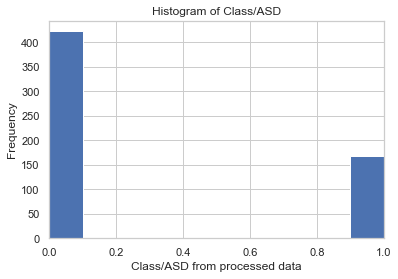

In [38]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_raw, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

In [39]:
features_final=features_final.drop(columns=['contry_of_res_Bangladesh','contry_of_res_Bolivia','contry_of_res_China',
       'contry_of_res_Costa Rica', 'contry_of_res_Cyprus',
       'contry_of_res_Czech Republic',  'contry_of_res_Finland',  'contry_of_res_Indonesia',
       'contry_of_res_Japan',  'contry_of_res_Nicaragua', 'contry_of_res_Niger', 'contry_of_res_Oman',
       'contry_of_res_Saudi Arabia', 'contry_of_res_Sierra Leone', 'contry_of_res_Sweden',
       'contry_of_res_Tonga', 'contry_of_res_Ukraine','contry_of_res_Uruguay'])

In [40]:
features_final

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_Sri Lanka,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.143931,1,0,1,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0.081464,1,1,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.074730,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0.187876,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0.170991,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.517558,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
796,0.129035,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
797,0.138157,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
798,0.154053,1,1,1,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


## Shuffle and Split Data
Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [41]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_raw, train_size=0.80, random_state=1)


# Show the results of the split
print( "Training set has {} samples.".format(X_train.shape[0]))
print( "Testing set has {} samples.".format(X_test.shape[0]))

Training set has 473 samples.
Testing set has 119 samples.


## Step 4: Models

I have applied the following supervised learning models in this project which are currently available in scikit-learn.

(1) Decision Trees

(2) Random Forest

(3) Support Vector Machines (SVM)

(4) K-Nearest Neighbors (KNeighbors)

(5) Gaussian Naive Bayes (GaussianNB)

(6) Logistic Regression

(7) Linear Discriminant Analysis (LDA)

(8) Quadratic Discriminant Analysis (QDA)

## (1) Decision Trees
I start with creating a DecisionTreeClassifier and fit it to the training data.

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Depiction of Decision Tree algorithm

In [43]:
import pydotplus 

dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
#Image(graph.create_png()) 
#graph.write_png('tree.png')

## Evaluating Model Performance
### Metrics
We can use F-beta score as a metric that considers both precision and recall:

 
In particular, when more emphasis is placed on precision. This is called the F score (or F-score for simplicity).

### Note: Recap of accuracy, precision, recall

### Accuracy 
It is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

Accuracy = [(True Positive + True Negative)/(True Positives + True Negative + False Positives + False Negative)]


### Precision 
It is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). The precision measures the model's accuracy in classifying a sample as positive.

Precision = [True Positives/(True Positives + False Positives)]

### Recall (sensitivity) 
The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected.

Recall = [True Positives/(True Positives + False Negatives)]


accuracy by itself is not a very good metric. Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [44]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [45]:
# print the first 20 true and predicted responses
print('True:', y_test.values[0:20])
print('False:', y_pred_class[0:20])

True: [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
False: [0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0]


In [46]:
from sklearn import metrics
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
#print(metrics.confusion_matrix(y_test, y_pred_class))

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[64 17]
 [ 6 32]]


## Metrics computed from a confusion matrix

In [47]:
# Classification Accuracy: Overall, how often is the classifier correct
# use float to perform true division, not integer division
print('Classification Accuracy: ', (TP + TN) / float(TP + TN + FP + FN))

Classification Accuracy:  0.8067226890756303


In [48]:
# Classification Error: Overall, how often is the classifier incorrect:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error: ', classification_error)

Classification Error:  0.19327731092436976


In [49]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)
print('Sensitivity: ', sensitivity)
print('Recall: ', metrics.recall_score(y_test, y_pred_class))

Sensitivity:  0.8421052631578947
Recall:  0.8421052631578947


In [50]:
# Specificity: When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)
print('Specificity: ', specificity)

Specificity:  0.7901234567901234


In [51]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate: ', false_positive_rate)
#print(1 - specificity)

False Positive Rate:  0.20987654320987653


In [52]:
# Precision: When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
#print(precision)
print('Precision: ', metrics.precision_score(y_test, y_pred_class))

Precision:  0.6530612244897959


## Visualizing the classification prediction

In [53]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
dectree.predict(X_test)[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [54]:
# print the first 10 predicted probabilities of class membership
dectree.predict_proba(X_test)[0:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [55]:
# store the predicted probabilities for class 1
y_pred_prob = dectree.predict_proba(X_test)[:, 1]

In [56]:
# allow plots to appear in the notebook

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

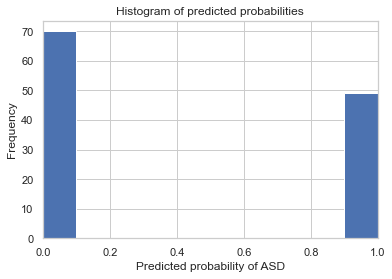

In [57]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of ASD')
plt.ylabel('Frequency')

## Receiver Operating Characteristic (ROC) Curves
It would be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold. Lets plot the ROC curve.

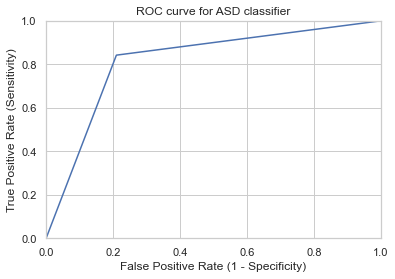

In [58]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for ASD classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [59]:
# Score metric for Model performance
dectree.score(X_test, y_test)

0.8067226890756303

## Cross-validation:
Now instead of a single train/test split, I use K-Fold cross validation to get a better measure of your model's accuracy (K=10).

In [60]:
from sklearn.model_selection import cross_val_score

dectree = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(dectree, features_final, asd_raw, cv=10)

cv_scores.mean()

0.7687005649717514

## AUC Score:
AUC is the percentage of the ROC plot that is underneath the curve

In [61]:
# calculate cross-validated AUC
cross_val_score(dectree, features_final, asd_raw, cv=10, scoring='roc_auc').mean()

0.7133480717868543

## F-beta Score:

In [62]:
dectree.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.6837606837606838

## (2) Random Forest
Now I apply a RandomForestClassifier instead to see whether it performs better.

In [63]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_raw, cv=10)
cv_scores.mean()

0.8311016949152542

In [64]:
# AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cross_val_score(ranfor, features_final, asd_raw, cv=10, scoring='roc_auc').mean()

0.8640617875056998

In [65]:
# F-beta Score:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7526881720430109

## (3) SVM
Now let us try using svm.SVC with a linear kernel and see how well it does in comparison to the decision tree.

In [66]:
from sklearn import svm
C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [67]:
cv_scores = cross_val_score(svc, features_final, asd_raw, cv=10)
cv_scores.mean()

0.8412146892655368

In [68]:
# AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cross_val_score(svc, features_final, asd_raw, cv=10, scoring='roc_auc').mean()

0.8948297342192693

In [69]:
# F-beta Score:

svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7079646017699115

## (4) K-Nearest-Neighbors (KNN)
Now I explore the K-Nearest-Neighbors algorithm with a starting value of K=10. Recall that K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on your particular data set.

In [70]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_raw, cv=10)
cv_scores.mean()

0.849774011299435

In [71]:
# AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cross_val_score(knn, features_final, asd_raw, cv=10, scoring='roc_auc').mean()

0.8877485587258158

In [72]:
#F-beta Score:

knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7317073170731708

Choosing K is tricky, so I can't discard KNN until we've tried different values of K. Hence I write a for loop to run KNN with K values ranging from 10 to 50 and see if K makes a substantial difference.

In [73]:
print('n','   Mean of cv_score')
print('--------------------------------')
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_raw, cv=10)
    print (n, '  ', cv_scores.mean())

n    Mean of cv_score
--------------------------------
10    0.849774011299435
11    0.842966101694915
12    0.8480790960451976
13    0.8446610169491526
14    0.8531355932203389
15    0.8548022598870058
16    0.8514406779661018
17    0.8531638418079096
18    0.8565254237288136
19    0.8531638418079096
20    0.8582485875706215
21    0.8531638418079096
22    0.8616384180790961
23    0.8615819209039548
24    0.8683898305084746
25    0.8599152542372883
26    0.8666949152542374
27    0.8565254237288136
28    0.8633050847457626
29    0.8564971751412429
30    0.8615819209039548
31    0.8615819209039548
32    0.8649717514124294
33    0.8615819209039548
34    0.8615819209039548
35    0.8581920903954801
36    0.8598870056497174
37    0.8564971751412431
38    0.8632485875706216
39    0.8565254237288136
40    0.8615819209039548
41    0.8581920903954803
42    0.8581920903954803
43    0.8548022598870058
44    0.8581920903954801
45    0.8581920903954803
46    0.8531073446327684
47    0.85483050847457

## (5) Naive Bayes
Now I try naive_bayes.MultinomialNB classifier and ask how does its accuracy stack up.

In [74]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_raw, cv=10)

cv_scores.mean()

0.848050847457627

In [75]:
# AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cross_val_score(nb, features_final, asd_raw, cv=10, scoring='roc_auc').mean()

0.9052036512279331

In [76]:
# F-beta Score:

nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.7051282051282052

## (6) Logistic Regression
We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Let's try Logisitic Regression, which is a simple way to tackling this sort of things.

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_raw, cv=10)
cv_scores.mean()

0.8565254237288136

In [78]:
#AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cv_scores_roc = cross_val_score(logreg, features_final, asd_raw, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.906639225457625

In [79]:
# F-beta Score:

logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.752212389380531

## (7) Linear Discriminant Analysis

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_raw, cv=10)
cv_scores.mean()

0.8446327683615819

In [81]:
#AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cv_scores_roc = cross_val_score(lda, features_final, asd_raw, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.8901683929385709

In [82]:
#F-beta Score:

lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.6956521739130433

## (8) Quadratic Discriminant Analysis

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, features_final, asd_raw, cv=10)
cv_scores.mean()

0.351271186440678

In [84]:
# AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

# calculate cross-validated AUC
cv_scores_roc = cross_val_score(qda, features_final, asd_raw, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.7094313888346037

In [85]:
# F-beta Score:

qda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = qda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.39408866995073893

## Step 6: Model Tuning
Now I will fine tune the chosen model. For this I use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. I will need to use the entire training set for this. In the code cell below, I will need to implement the following:

Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
Initialize the classifier you've chosen and store it in clf.
- Set a random_state if one is available to the same state you set before.
Create a dictionary of parameters you wish to tune for the chosen model.
- Example: parameters = {'parameter' : [list of values]}.
- Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
Use make_scorer to create an f-beta_score scoring object (with ).
Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.

Note that, svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Here I experiented with different kernels such as 'rbf', 'sigmoid', and 'poly' and found that the best-performing kernel is linear.

In [86]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)


# TODO: Initialize the classifier
clf = SVC(random_state = 1)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------------------------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n----------------------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------------------------
Accuracy score on testing data: 0.8487
F-score on testing data: 0.7391

Optimized Model
----------------------
Final accuracy score on the testing data: 0.8403
Final F-score on the testing data: 0.7474


## Step 7: Feature Importance
An important task when performing supervised learning on a dataset like the autistic data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual has ASD or not.

Choose a scikit-learn classifier (e.g., gradientBoosting, adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the ASD dataset.

## Extracting Feature Importance
Choose a scikit-learn supervised learning algorithm that has a feature_importance_ attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, I will implement the following:

- Import a supervised learning model from sklearn if it is different from the three used earlier.
- Train the supervised model on the entire training set.
- Extract the feature importances using '.feature_importances_'.

In [87]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(importances)
# Plot
#vs.feature_plot(importances, X_train, y_train)

[4.73092730e-02 3.50637402e-02 2.70945506e-03 3.50994741e-01
 4.29185088e-02 3.92587062e-02 1.09593217e-01 5.32189989e-04
 7.70323398e-04 1.22361087e-01 2.30023909e-02 1.25433830e-03
 4.63471717e-03 3.86327187e-03 3.62740027e-03 5.55737302e-03
 3.23401815e-03 5.91717413e-03 1.06935827e-02 1.31558417e-05
 1.41789049e-02 0.00000000e+00 2.82689499e-02 0.00000000e+00
 5.06829800e-03 1.16149771e-03 1.06050107e-02 6.51900722e-03
 8.19527257e-05 0.00000000e+00 0.00000000e+00 1.38425801e-03
 1.27086150e-03 0.00000000e+00 7.73430913e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.22590580e-03 0.00000000e+00
 1.27059467e-02 0.00000000e+00 1.53890534e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.59142872e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.63648354e-03
 5.18306674e-03 0.00000000e+00 0.00000000e+00 1.35227335e-03
 3.29278723e-04 1.18255090e-02 4.46678434e-03 0.00000000e+00
 0.00000000e+00 3.75361249e-03 0.00000000e+00 0.00000000e+00
 3.15784307e-03 0.000000

In [88]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
#print(importances)
# Plot
#vs.feature_plot(importances, X_train, y_train)

## Feature Selection
We need to ask ourselves how does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features(in order with their weightage factor) contribute more than half of the importance of all features present in the data. These 5 features are:

- 'result'
- 'relation_self'
- 'country_of_residence'
- 'jaundice_no'
- 'jaundice_yes'

This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. Although looking at those weight factor it seems like 'result' feature is clearly dominating its influence on the algorithms over all other features.

## Step 8: Building a MLP model architecture
In this last part I build a model here using sequential model architecture best known as Multi Layer Perceptron (MLP).

In [89]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

np.random.seed(42)

In [90]:
# Using TensorFlow backend
# Building the model architecture with one layer of length 4


model_nn = Sequential()
model_nn.add(Dense(8, activation='relu', input_dim= 75))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 608       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 617
Trainable params: 617
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model_nn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [92]:
# Running and evaluating the model
hist = model_nn.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
30/30 - 1s - loss: 0.6865 - accuracy: 0.6385 - val_loss: 0.6791 - val_accuracy: 0.6807 - 543ms/epoch - 18ms/step
Epoch 2/100
30/30 - 0s - loss: 0.6646 - accuracy: 0.7230 - val_loss: 0.6596 - val_accuracy: 0.6807 - 65ms/epoch - 2ms/step
Epoch 3/100
30/30 - 0s - loss: 0.6414 - accuracy: 0.7230 - val_loss: 0.6380 - val_accuracy: 0.6807 - 48ms/epoch - 2ms/step
Epoch 4/100
30/30 - 0s - loss: 0.6183 - accuracy: 0.7230 - val_loss: 0.6158 - val_accuracy: 0.6807 - 48ms/epoch - 2ms/step
Epoch 5/100
30/30 - 0s - loss: 0.5840 - accuracy: 0.7273 - val_loss: 0.5882 - val_accuracy: 0.6807 - 47ms/epoch - 2ms/step
Epoch 6/100
30/30 - 0s - loss: 0.5618 - accuracy: 0.7378 - val_loss: 0.5600 - val_accuracy: 0.6807 - 48ms/epoch - 2ms/step
Epoch 7/100
30/30 - 0s - loss: 0.5268 - accuracy: 0.7421 - val_loss: 0.5312 - val_accuracy: 0.7143 - 47ms/epoch - 2ms/step
Epoch 8/100
30/30 - 0s - loss: 0.5013 - accuracy: 0.7548 - val_loss: 0.5030 - val_accuracy: 0.7395 - 46ms/epoch - 2ms/step
Epoch 9/100
30

Epoch 68/100
30/30 - 0s - loss: 0.2820 - accuracy: 0.8647 - val_loss: 0.3201 - val_accuracy: 0.8655 - 47ms/epoch - 2ms/step
Epoch 69/100
30/30 - 0s - loss: 0.2874 - accuracy: 0.8774 - val_loss: 0.3193 - val_accuracy: 0.8655 - 47ms/epoch - 2ms/step
Epoch 70/100
30/30 - 0s - loss: 0.2962 - accuracy: 0.8605 - val_loss: 0.3194 - val_accuracy: 0.8655 - 46ms/epoch - 2ms/step
Epoch 71/100
30/30 - 0s - loss: 0.2945 - accuracy: 0.8879 - val_loss: 0.3202 - val_accuracy: 0.8655 - 44ms/epoch - 1ms/step
Epoch 72/100
30/30 - 0s - loss: 0.2893 - accuracy: 0.8837 - val_loss: 0.3194 - val_accuracy: 0.8403 - 47ms/epoch - 2ms/step
Epoch 73/100
30/30 - 0s - loss: 0.2840 - accuracy: 0.8795 - val_loss: 0.3202 - val_accuracy: 0.8571 - 48ms/epoch - 2ms/step
Epoch 74/100
30/30 - 0s - loss: 0.2867 - accuracy: 0.8732 - val_loss: 0.3213 - val_accuracy: 0.8655 - 47ms/epoch - 2ms/step
Epoch 75/100
30/30 - 0s - loss: 0.2862 - accuracy: 0.8964 - val_loss: 0.3211 - val_accuracy: 0.8655 - 50ms/epoch - 2ms/step
Epoch 76

## Evaluating the model
This will give you the accuracy of the model.

In [93]:
# Evaluating the model on the training and testing set
score = model_nn.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])

score = model_nn.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

15/15 [==============================] - 0s 827us/step - loss: 0.2568 - accuracy: 0.8922

 Training Accuracy: 0.8921775817871094

 Testing accuracy:  0.8403361439704895


## Free-Flow Visualization:
As with "Feature Selection" exploration, we have seen the attribute named 'result' has a such a powerful presence in the ASD dataset, all other attributes have little to no contribution in deciding the final class. In the Figure below, I have drawn a scatterplot with 'result' as x-axis and ASD-class (say 'yes' is 1 and 'no' is 0) as y-axis, and reconfirmed that underlying association between the given variables.

In [94]:
#asd_data['result'] = asd_data['result'].apply(lambda x: (np.log(x + 1)))
#asd_data = pd.DataFrame(data = asd_data)
#asd_data['result'] = scaler.fit_transform(asd_data['result'])

<AxesSubplot:xlabel='result', ylabel='Class/ASD'>

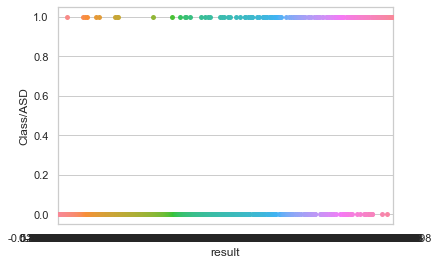

In [95]:
sns.stripplot(x="result", y="Class/ASD", data = asd_data, jitter=True)

## Step 9: Conclusion
After exploring my ASD dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used three different metric (such as accuracy, AUC score and F-score) to measure the performance of my models, and it seems like all of the metric indicated an almost perfect classification of the ASD cases. Here I think the reason of this high performances with different models is the fact that only one of the feature is predominant over all others which I confirmed with the Feature Importance section in this notebook.

I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that I can claim that this model is optimum. In that consideration, my models can serve as benchmark models for any machine learning researcher/practitioner who will be interested to explore this dataset further. With this fact in mind, I think this are very well developed model that can detect ASD in indivisuals with certain given attributes.

In [96]:
features_final

,age,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_Sri Lanka,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.143931,1,0,1,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0.081464,1,1,1,1,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.074730,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0.187876,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0.170991,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.517558,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
796,0.129035,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
797,0.138157,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
798,0.154053,1,1,1,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0


In [97]:
asd_raw

0      0
2      1
4      0
6      0
8      1
      ..
795    1
796    0
797    1
798    0
799    0
Name: Class/ASD, Length: 592, dtype: int64

In [98]:
features_final.columns

Index(['age', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f',
       'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic',
       'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish',
       'ethnicity_White-European', 'ethnicity_others', 'jaundice_no',
       'jaundice_yes', 'austim_no', 'austim_yes', 'contry_of_res_Afghanistan',
       'contry_of_res_AmericanSamoa', 'contry_of_res_Angola',
       'contry_of_res_Argentina', 'contry_of_res_Armenia',
       'contry_of_res_Aruba', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Azerbaijan',
       'contry_of_res_Bahamas', 'contry_of_res_Belgium',
       'contry_of_res_Brazil', 'contry_of_res_Canada', 'contry_of_res_Egypt',
       'contry_of_res_Ethiopia', 'contry_of_res_France',
       'contry_of_res_Germany', 'cont

## Train and Test score of Different Models:

1) Decision Trees

2) Random Forest

3) Support Vector Machines (SVM)

4) K-Nearest Neighbors (KNeighbors)

5) Gaussian Naive Bayes (GaussianNB)

6) Logistic Regression

7) Linear Discriminant Analysis (LDA)

8) Quadratic Discriminant Analysis (QDA)

9) Grid Search CV Accuracy

10) Gradient Boosting Accuracy

11) Neural Network

##  Decision Trees

In [99]:
print('Train Score: ', dectree.score(X_train,y_train))
print('Test Score: ', dectree.score(X_test,y_test))

Train Score:  1.0
Test Score:  0.8067226890756303


## Random Forest

In [100]:
print('Train Score: ', ranfor.score(X_train,y_train))
print('Test Score: ', ranfor.score(X_test,y_test))

Train Score:  0.9809725158562368
Test Score:  0.8403361344537815


## Support Vector Machines (SVM)

In [101]:
print('Train Score: ', svc.score(X_train,y_train))
print('Test Score: ', svc.score(X_test,y_test))

Train Score:  0.8985200845665962
Test Score:  0.8235294117647058


## K Nearest Neighbors

In [102]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=49)

In [103]:
print('Train Score: ', knn.score(X_train,y_train))
print('Test Score: ', knn.score(X_test,y_test))

Train Score:  0.8625792811839323
Test Score:  0.8823529411764706


## Gaussian Naive Bayes

In [104]:
print('Train Score: ', nb.score(X_train,y_train))
print('Test Score: ', nb.score(X_test,y_test))

Train Score:  0.8625792811839323
Test Score:  0.8235294117647058


## Logistic Regression

In [105]:
print('Train Score: ', logreg.score(X_train,y_train))
print('Test Score: ', logreg.score(X_test,y_test))

Train Score:  0.8964059196617337
Test Score:  0.8571428571428571


 ## Linear Discriminant Analysis (LDA)

In [106]:
print('Train Score: ', lda.score(X_train,y_train))
print('Test Score: ', lda.score(X_test,y_test))

Train Score:  0.8964059196617337
Test Score:  0.8151260504201681


## Quadratic Discriminant Analysis (QDA)

In [107]:
print('Train Score: ', qda.score(X_train,y_train))
print('Test Score: ', qda.score(X_test,y_test))

Train Score:  0.4376321353065539
Test Score:  0.44537815126050423


## Grid Search CV

In [108]:
print('Train Score: ', grid_obj.score(X_train,y_train))
print('Test Score: ', grid_obj.score(X_test,y_test))

Train Score:  0.9574468085106385
Test Score:  0.7474226804123711


## Gradient Boosting

In [109]:
print('Train Score: ', model.score(X_train,y_train))
print('Test Score: ', model.score(X_test,y_test))

Train Score:  0.9112050739957717
Test Score:  0.8151260504201681


## Neural Network

In [110]:
# Evaluating the model on the training and testing set
score = model_nn.evaluate(X_train, y_train)
print("\n Train Score:", score[1])

score = model_nn.evaluate(X_test, y_test, verbose=0)
print("\n Test Score: ", score[1])

15/15 [==============================] - 0s 758us/step - loss: 0.2568 - accuracy: 0.8922

 Train Score: 0.8921775817871094

 Test Score:  0.8403361439704895


## AUC Score of different model

In [111]:
# calculate cross-validated AUC
print('AUC Score of Decision Tree: ', cross_val_score(dectree, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Decision Tree:  0.7133480717868543


In [112]:
# calculate cross-validated AUC
print('AUC Score of Random Forest: ',cross_val_score(ranfor, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Random Forest:  0.8640617875056998


In [113]:
# calculate cross-validated AUC
print('AUC Score of Support Vector Machine: ',cross_val_score(svc, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Support Vector Machine:  0.8948297342192693


In [114]:
# calculate cross-validated AUC
print('AUC Score of K Nearest Neighbors: ',cross_val_score(knn, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of K Nearest Neighbors:  0.9154216337697869


In [115]:
# calculate cross-validated AUC
print('AUC Score of Gaussian Naive Bayes: ',cross_val_score(nb, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Gaussian Naive Bayes:  0.9052036512279331


In [116]:
# calculate cross-validated AUC
print('AUC Score of Logistic Regression: ',cross_val_score(logreg, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Logistic Regression:  0.906639225457625


In [117]:
# calculate cross-validated AUC
print('AUC Score of Linear Discriminant Analysis (LDA): ',cross_val_score(lda, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Linear Discriminant Analysis (LDA):  0.8901683929385709


In [118]:
# calculate cross-validated AUC
print('AUC Score of Quadratic Discriminant Analysis (QDA): ',cross_val_score(qda, features_final, asd_raw, cv=10, scoring='roc_auc').mean())

AUC Score of Quadratic Discriminant Analysis (QDA):  0.7094313888346037


## AUC Score of different models are:

- Decision Tree: 0.7133480717868543
- Random Forest: 0.8640617875056998
- Support Vector Machine.: 0.8948297342192693
- K Nearest Neighbors:  0.9154216337697869
- Gaussian Naive Bayes: 0.9052036512279331
- Logistic Regression: 0.906639225457625
- Linear Discriminant Analysis (LDA): 0.8901683929385709
- Quadratic Discriminant Analysis (QDA): 0.7094313888346037

## K Nearest Neighbors AUC Score(0.9154216337697869) is highest.

# Prediction on test set

In [119]:
test_data=pd.read_csv('test.csv')

In [120]:
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [121]:
test_data.shape

(200, 21)

In [122]:
test_data.isnull().any()

ID                 False
A1_Score           False
A2_Score           False
A3_Score           False
A4_Score           False
A5_Score           False
A6_Score           False
A7_Score           False
A8_Score           False
A9_Score           False
A10_Score          False
age                False
gender             False
ethnicity          False
jaundice           False
austim             False
contry_of_res      False
used_app_before    False
result             False
age_desc           False
relation           False
dtype: bool

In [123]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [124]:
test_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.585000,0.285000,0.355000,0.450000,0.475000,0.21000,0.285000,0.725000,0.330000,0.390000,27.875051,6.912688
std,57.879185,0.493958,0.452547,0.479714,0.498742,0.500628,0.40833,0.452547,0.447635,0.471393,0.488974,12.489213,3.949887
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,7.822865,-1.721289
25%,50.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.889947,4.303175
50%,100.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,24.754095,7.138223
75%,150.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,31.165789,9.756596
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,66.163937,13.369400


In [125]:
test_data= pd.read_csv('test.csv', na_values=['?'])

In [126]:
#test_data.dropna(inplace=True)

In [127]:
test_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.585000,0.285000,0.355000,0.450000,0.475000,0.21000,0.285000,0.725000,0.330000,0.390000,27.875051,6.912688
std,57.879185,0.493958,0.452547,0.479714,0.498742,0.500628,0.40833,0.452547,0.447635,0.471393,0.488974,12.489213,3.949887
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,7.822865,-1.721289
25%,50.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.889947,4.303175
50%,100.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,24.754095,7.138223
75%,150.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,31.165789,9.756596
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,66.163937,13.369400


In [128]:
test_data.shape

(200, 21)

Previously the shape of the test dataset was (200, 21). After cleaning the data, the shape is now (154,21).

If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN'.

In [129]:
# drop unwanted column
test_data=test_data.drop(['result', 'age_desc'], axis=1)

In [130]:
# convert the data into categorical values : one_hot_coded_vectors
test_data=pd.get_dummies(test_data)

In [131]:
test_data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian',
       'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others',
       'jaundice_no', 'jaundice_yes', 'austim_no', 'austim_yes',
       'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa',
       'contry_of_res_Angola', 'contry_of_res_Argentina',
       'contry_of_res_Armenia', 'contry_of_res_Australia',
       'contry_of_res_Austria', 'contry_of_res_Azerbaijan',
       'contry_of_res_Bahamas', 'contry_of_res_Belgium',
       'contry_of_res_Brazil', 'contry_of_res_Burundi', 'contry_of_res_Canada',
       'contry_of_res_Egypt', 'contry_of_res_Ethiopia', 'contry_of_res_France',
       'contry_of_res_Germany

In [132]:
test_data=test_data.drop(columns=['contry_of_res_Burundi','contry_of_res_Lebanon','contry_of_res_Angola','contry_of_res_Spain'])

In [133]:
test_data

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,used_app_before_no,used_app_before_yes,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,5,1,0,0,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
196,197,1,1,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
197,198,1,0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
198,199,1,1,1,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1


In [134]:
test_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Viet Nam,used_app_before_no,used_app_before_yes,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,4,1,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,5,1,0,0,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1


In [135]:
test_data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ',
       'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian',
       'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others',
       'jaundice_no', 'jaundice_yes', 'austim_no', 'austim_yes',
       'contry_of_res_Afghanistan', 'contry_of_res_AmericanSamoa',
       'contry_of_res_Argentina', 'contry_of_res_Armenia',
       'contry_of_res_Australia', 'contry_of_res_Austria',
       'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas',
       'contry_of_res_Belgium', 'contry_of_res_Brazil', 'contry_of_res_Canada',
       'contry_of_res_Egypt', 'contry_of_res_Ethiopia', 'contry_of_res_France',
       'contry_of_res_Germany', 'contry_of_res_Iceland', 'contry_of_res_India',
     

In [136]:
test_no_id = test_data.drop('ID', axis=1)

## Using K Nearest Neighbors Prediction

In [137]:
test_predictions_knn = knn.predict(test_no_id)

In [138]:
test_ID = test_data['ID']
submission_df_final = pd.DataFrame({
                  "ID": test_ID, 
                  "Class/ASD": test_predictions_knn})

In [139]:
submission_df_final.to_csv('submission_final.csv', index=False)

In [140]:
my_pred_output_final = pd.read_csv('submission_final.csv')

In [141]:
my_pred_output_final

,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0
...,...,...
195,196,0
196,197,1
197,198,1
198,199,1


In [142]:
# Reminder of the features:
print(my_pred_output_final.dtypes)


# Total number of records in clean dataset
test_n_records = len(my_pred_output_final.index)

# TODO: Number of records where individual's with ASD in the clean dataset
test_n_asd_yes = len(my_pred_output_final[my_pred_output_final['Class/ASD'] == 1])

# TODO: Number of records where individual's with no ASD in the clean dataset
test_n_asd_no = len(my_pred_output_final[my_pred_output_final['Class/ASD'] == 0])

# Print the results
print('---------------------Using K Nearest Neighbors---------------------------------------')
print("Total number of records: {}".format(test_n_records))
print("Individuals diagonised with ASD: {}".format(test_n_asd_yes))
print("Individuals not diagonised with ASD: {}".format(test_n_asd_no))

ID           int64
Class/ASD    int64
dtype: object
---------------------Using K Nearest Neighbors---------------------------------------
Total number of records: 200
Individuals diagonised with ASD: 73
Individuals not diagonised with ASD: 127
